In [45]:
from matplotlib.ticker import LinearLocator, MultipleLocator, AutoMinorLocator
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
from astropy import units as u
import sys
import site
import matplotlib.pyplot as plt
from math import *
from tkinter import *
import astropy.units as u
import numpy as np
import pandas as pd
import plotly.express as px

In [46]:
fits = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\all-final-var.xlsx')
guess = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\all-guesses.xlsx')


In [47]:
data = pd.concat([fits, guess], axis=1)
#data.query('final_fit_type == "broken_cut"', inplace = True)

In [48]:
data

,Source.Name,final_fit_type,Reduced chi sq,c1,c1_err,gamma1,gamma1_err,gamma2,gamma2_err,break_point_mev,...,gamma1_guess,gamma2_guess,c1_guess,alpha_guess,break_guess_mev,cutoff_guess_mev,Use random,Iterations,min_e_mev,max_e_mev
0,2020-11-17-0932-fit-result-variables_ept_het-p...,broken,0.120527,799.344912,70.692297,-5.126234,1.108236,-2.303989,1.345064,0.080302,...,-1.9,-2.5,1000.0,7.16,0.10,0.12,True,20,0.004575,0.208593
1,2020-11-17-0932-fit-result-variables_ept_het-p...,broken_cut,0.235300,612.095317,94.108332,-6.493738,8.515233,-2.411906,34.511053,0.180523,...,-1.9,-2.5,1000.0,7.16,0.10,0.12,True,20,0.004575,1.590048
2,2020-11-17-0932-fit-result-variables_ept-peak-...,single,0.888863,0.072563,0.067506,-4.121725,0.312002,NaN,NaN,NaN,...,-1.9,-2.5,1000.0,7.16,0.10,0.12,True,20,0.004575,0.191333
3,2020-11-17-0932-fit-result-variables_ept-peak-...,broken,0.120527,799.346444,70.692150,-5.126262,1.108306,-2.303987,1.345100,0.080302,...,-1.9,-2.5,1000.0,7.16,0.10,0.12,True,20,0.004575,0.208593
4,2020-11-17-0932-fit-result-variables_ept-peak-...,broken,0.234333,593.961596,56.486671,-6.088854,5.056150,-0.016740,8.992800,0.124066,...,-1.9,-2.5,1000.0,7.16,0.10,0.12,True,20,0.004575,1.590048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-03-14-1714-fit-result-variables_ept_het-p...,cut,0.303312,709.942616,67.607408,-1.347453,0.159441,NaN,NaN,NaN,...,-1.9,-2.5,1000.0,7.16,0.06,0.12,True,20,0.035000,1.590048
349,2022-03-14-1714-fit-result-variables_ept_het-p...,cut,0.310879,509.963017,37.740674,-1.459540,0.122300,NaN,NaN,NaN,...,-1.9,-2.5,1000.0,7.16,0.06,0.12,True,20,0.035000,1.590048
350,2022-03-14-1714-fit-result-variables_ept-peak-...,single,0.163036,32.764165,7.910738,-1.448703,0.098466,NaN,NaN,NaN,...,-1.9,-2.5,1000.0,7.16,0.06,0.12,True,20,0.035000,1.590048
351,2022-03-14-1714-fit-result-variables_ept-peak-...,single,0.338095,22.688924,6.328852,-1.465404,0.114504,NaN,NaN,NaN,...,-1.9,-2.5,1000.0,7.16,0.06,0.12,True,20,0.035000,1.590048


In [49]:
data.columns

Index(['Source.Name', 'final_fit_type', 'Reduced chi sq', 'c1', 'c1_err',
       'gamma1', 'gamma1_err', 'gamma2', 'gamma2_err', 'break_point_mev',
       'break_point_err_mev', 'exp_cutoff_point_mev', 'cutoff_err_mev',
       'alpha', 'year', 'month', 'day', 'time', 'fit', 'Source.Name', 'Date',
       'averaging', 'Direction', 'Data type', 'distance_au', 'STEP', 'EPT',
       'HET', 'Sigma', 'Relative error', 'Fraction of nan',
       'Leave first HET channel out', 'Shift STEP data', 'type_of_fit',
       'Fit to', 'Window', 'which_fit', 'gamma1_guess', 'gamma2_guess',
       'c1_guess', 'alpha_guess', 'break_guess_mev', 'cutoff_guess_mev',
       'Use random', 'Iterations', 'min_e_mev', 'max_e_mev'],
      dtype='object')

### Energy channels:
#### step energy range: 0.004323343613-0.07803193193
#### ept energy range: 0.03295087252-0.452730295
#### het energy range: 0.6859485403-10.62300288
#### second het channel: 1.590048112

In [50]:
#data = pd.concat([fit_run, make_fit], axis=1)
#data.query('fit_type == "best" and type_of_fit == "step_ept_het" and min_e_mev<0.03295087252 and max_e_mev >0.6859485403' , inplace = True)


step_ept_het = data.where((data.type_of_fit == "step_ept_het"), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept = data.where((data.type_of_fit == "step_ept") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het = data.where((data.type_of_fit == "ept_het")  , np.nan)
step = data.where((data.type_of_fit == "step" ) , np.nan)
ept = data.where((data.type_of_fit == "ept") , np.nan)


one_step_ept_het = step_ept_het.where((step_ept_het.averaging == '1min'), np.nan)
two_step_ept_het = step_ept_het.where((step_ept_het.averaging == '2min'), np.nan)
five_step_ept_het= step_ept_het.where((step_ept_het.averaging == '5min'), np.nan)

one_step_ept = step_ept.where((step_ept.averaging == '1min'), np.nan)
two_step_ept = step_ept.where((step_ept.averaging == '2min'), np.nan)
five_step_ept= step_ept.where((step_ept.averaging == '5min'), np.nan)

one_ept_het = ept_het.where((ept_het.averaging == '1min'), np.nan)
two_ept_het = ept_het.where((ept_het.averaging == '2min'), np.nan)
five_ept_het= ept_het.where((ept_het.averaging == '5min'), np.nan)

one_step = step.where((step.averaging == '1min'), np.nan)
two_step = step.where((step.averaging == '2min'), np.nan)
five_step= step.where((step.averaging == '5min'), np.nan)

one_ept = ept.where((ept.averaging == '1min'), np.nan)
two_ept = ept.where((ept.averaging == '2min'), np.nan)
five_ept= ept.where((ept.averaging == '5min'), np.nan)



n1_step_ept_het = str(one_step_ept_het['gamma1'].count())
n2_step_ept_het = str(two_step_ept_het['gamma1'].count())
n5_step_ept_het = str(five_step_ept_het['gamma1'].count())

n1_step_ept = str(one_step_ept['gamma1'].count())
n2_step_ept = str(two_step_ept['gamma1'].count())
n5_step_ept = str(five_step_ept['gamma1'].count())

n1_ept_het = str(one_ept_het['gamma1'].count())
n2_ept_het = str(two_ept_het['gamma1'].count())
n5_ept_het = str(five_ept_het['gamma1'].count())

n1_step = str(one_step['gamma1'].count())
n2_step = str(two_step['gamma1'].count())
n5_step = str(five_step['gamma1'].count())

n1_ept = str(one_ept['gamma1'].count())
n2_ept = str(two_ept['gamma1'].count())
n5_ept = str(five_ept['gamma1'].count())

In [55]:
five = []
two = []
one = []
fone = []

for i in range(len(five_step_ept)):
    for j in range(len(two_step_ept)):
        if five_step_ept['day'][i] == two_step_ept['day'][j] and five_step_ept['month'][i] == two_step_ept['month'][j] and five_step_ept['year'][i] == two_step_ept['year'][j] and five_step_ept['time'][i] == two_step_ept['time'][j]:
            five.append(five_step_ept['break_point_mev'][i])
            two.append(two_step_ept['break_point_mev'][j])
        
for i in range(len(five_step_ept)):
    for j in range(len(one_step_ept)):
        if five_step_ept['day'][i] == one_step_ept['day'][j] and five_step_ept['month'][i] == one_step_ept['month'][j] and five_step_ept['year'][i] == one_step_ept['year'][j] and five_step_ept['time'][i] == one_step_ept['time'][j]:
            fone.append(five_step_ept['break_point_mev'][i])
            one.append(one_step_ept['break_point_mev'][j])

uno = []
due = []

        
for i in range(len(two_step_ept)):
    for j in range(len(one_step_ept)):
        if two_step_ept['day'][i] == one_step_ept['day'][j] and two_step_ept['month'][i] == one_step_ept['month'][j] and two_step_ept['year'][i] == one_step_ept['year'][j] and two_step_ept['time'][i] == one_step_ept['time'][j]:
            due.append(two_step_ept['break_point_mev'][i])
            uno.append(one_step_ept['break_point_mev'][j])


In [56]:
five_two = []
five_one = []

for i in range(len(five)):
    five_two.append(five[i]-two[i])
    
for j in range(len(fone)):
    five_one.append(fone[j]-one[j])
    

print(np.nanmean(five_two))
print(np.nanstd(five_two))


print(np.nanmean(five_one))
print(np.nanstd(five_one))

uno_due = []

for j in range(len(uno)):
    uno_due.append(uno[j]-due[j])
    

print(np.nanmean(uno_due))
print(np.nanstd(uno_due))

-0.0009823835518325747
0.009728305886508467
0.001615596125846932
0.01740740927072312
-0.0021668203709786266
0.014663062158874824


In [54]:
uno

[]

In [57]:
five = []
two = []
one = []
fone = []

for i in range(len(five_step)):
    for j in range(len(two_step)):
        if five_step['day'][i] == two_step['day'][j] and five_step['month'][i] == two_step['month'][j] and five_step['year'][i] == two_step['year'][j] and five_step['time'][i] == two_step['time'][j]:
            five.append(five_step['break_point_mev'][i])
            two.append(two_step['break_point_mev'][j])
        
for i in range(len(five_step)):
    for j in range(len(one_step)):
        if five_step['day'][i] == one_step['day'][j] and five_step['month'][i] == one_step['month'][j] and five_step['year'][i] == one_step['year'][j] and five_step['time'][i] == one_step['time'][j]:
            fone.append(five_step['break_point_mev'][i])
            one.append(one_step['break_point_mev'][j])

uno = []
due = []

        
for i in range(len(two_step)):
    for j in range(len(one_step)):
        if two_step['day'][i] == one_step['day'][j] and two_step['month'][i] == one_step['month'][j] and two_step['year'][i] == one_step['year'][j] and two_step['time'][i] == one_step['time'][j]:
            due.append(two_step['break_point_mev'][i])
            uno.append(one_step['break_point_mev'][j])


In [58]:
five_two = []
five_one = []

for i in range(len(five)):
    five_two.append(five[i]-two[i])
    
for j in range(len(fone)):
    five_one.append(fone[j]-one[j])
    

print(np.nanmean(five_two))
print(np.nanstd(five_two))


print(np.nanmean(five_one))
print(np.nanstd(five_one))

-0.001366099373880786
0.01784140728217695
0.0010238418299098272
0.024151670343437723


In [59]:
uno_due = []

for j in range(len(uno)):
    uno_due.append(uno[j]-due[j])
    

print(np.nanmean(uno_due))
print(np.nanstd(uno_due))

0.0015017076072716283
0.010662092922214293


In [33]:
five_two

[0.9625919460000008,
 2.147246196628516,
 1.2922371183039818,
 0.3431463849064258,
 0.3269236714845416,
 1.698039647271893,
 13.813123293334444,
 0.08041760339556814,
 0.16678837618214182,
 0.7327031821544573,
 0.21104173469877185,
 0.04330683201258845,
 0.5716552254000039,
 1.1447458384284586,
 0.8390231210759884,
 0.3668306247435966,
 0.11799043949973642,
 0.4235658536908664,
 0.10997200167907262,
 0.12913369343038505,
 0.4304710933250355,
 0.014876521417522603,
 0.8426713814569717,
 0.05574334417857085,
 0.6545141714244087,
 0.18616335583955435,
 0.47971388617129174,
 0.026179292781154384,
 1.0361556471527376,
 0.09274515352994017,
 0.3748458800497785,
 0.09485014310027351,
 0.2903990054074548,
 0.379730197532421,
 0.2707952438122828,
 0.04867945637931781,
 0.21761966738990157,
 0.15433658547977025,
 0.219428835283892,
 0.08184727420828919]

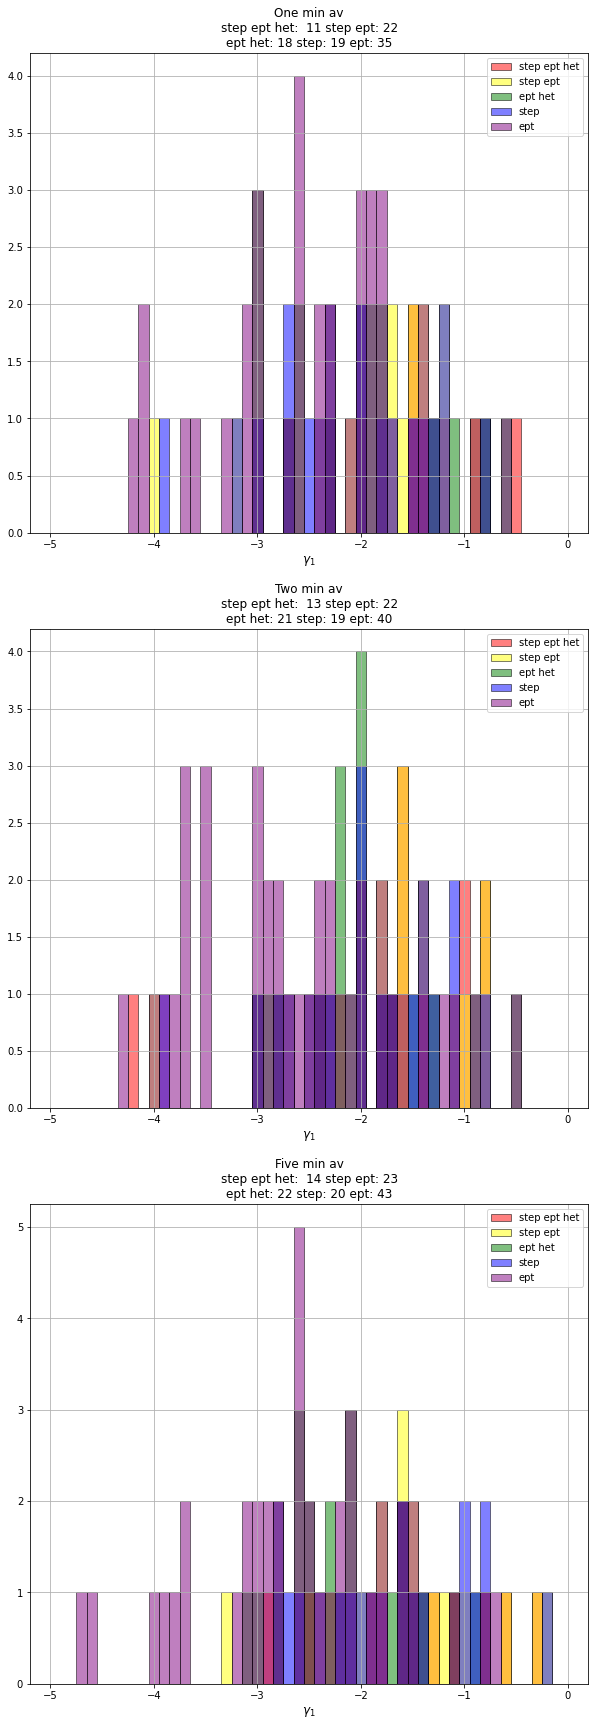

In [34]:
f, ax = plt.subplots(3,1, figsize=(10,30)) 

ax[0].hist(one_step_ept_het['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[0].hist(one_step_ept['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[0].hist(one_ept_het['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[0].hist(one_step['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[0].hist(one_ept['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[0].set_xlabel('$\gamma_1$', size=12)
ax[0].set_title('One min av'+'\n'+'step ept het:  '+ n1_step_ept_het+' '+'step ept: '+n1_step_ept+'\n'+'ept het: '+n1_ept_het+' '+'step: '+n1_step+' '+'ept: '+n1_ept)
ax[0].grid()
ax[0].legend(prop={'size': 10})

ax[1].hist(two_step_ept_het['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[1].hist(two_step_ept['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[1].hist(two_ept_het['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[1].hist(two_step['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[1].hist(two_ept['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[1].set_xlabel('$\gamma_1$', size=12) 
ax[1].set_title('Two min av'+'\n'+'step ept het:  '+ n2_step_ept_het+' '+'step ept: '+n2_step_ept+'\n'+'ept het: '+n2_ept_het+' '+'step: '+n2_step+' '+'ept: '+n2_ept)
ax[1].grid()
ax[1].legend(prop={'size': 10})

ax[2].hist(five_step_ept_het['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[2].hist(five_step_ept['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[2].hist(five_ept_het['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[2].hist(five_step['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[2].hist(five_ept['gamma1'], bins=np.arange(-5,0,0.1), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[2].set_xlabel('$\gamma_1$', size=12)
ax[2].set_title('Five min av'+'\n'+'step ept het:  '+ n5_step_ept_het+' '+'step ept: '+n5_step_ept+'\n'+'ept het: '+n5_ept_het+' '+'step: '+n5_step+' '+'ept: '+n5_ept)
ax[2].grid()
ax[2].legend(prop={'size': 10})

plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()


In [35]:
n1_step_ept_het = str(one_step_ept_het['gamma2'].count())
n2_step_ept_het = str(two_step_ept_het['gamma2'].count())
n5_step_ept_het = str(five_step_ept_het['gamma2'].count())

n1_step_ept = str(one_step_ept['gamma2'].count())
n2_step_ept = str(two_step_ept['gamma2'].count())
n5_step_ept = str(five_step_ept['gamma2'].count())

n1_ept_het = str(one_ept_het['gamma2'].count())
n2_ept_het = str(two_ept_het['gamma2'].count())
n5_ept_het = str(five_ept_het['gamma2'].count())

n1_step = str(one_step['gamma2'].count())
n2_step = str(two_step['gamma2'].count())
n5_step = str(five_step['gamma2'].count())

n1_ept = str(one_ept['gamma2'].count())
n2_ept = str(two_ept['gamma2'].count())
n5_ept = str(five_ept['gamma2'].count())

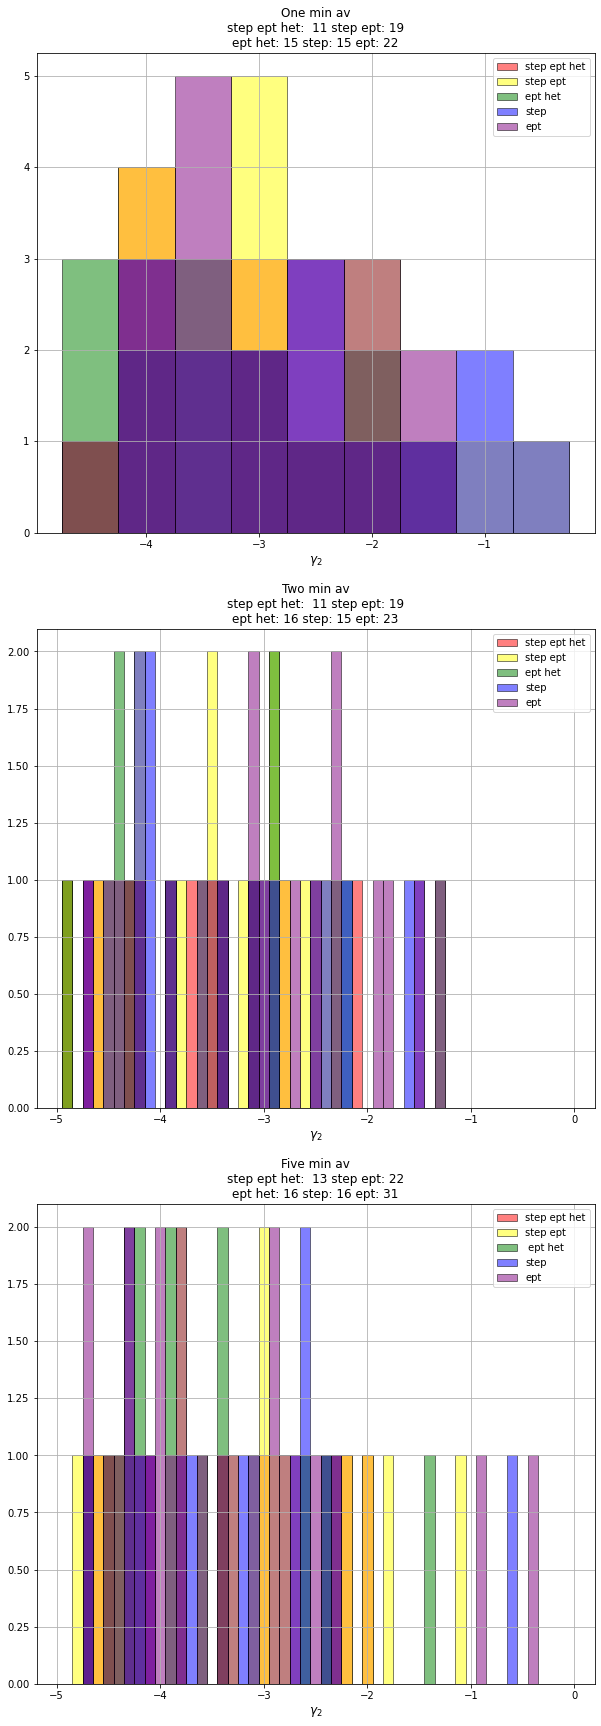

In [36]:
f, ax = plt.subplots(3,1, figsize=(10,30)) 

ax[0].hist(one_step_ept_het['gamma2'], bins=np.arange(-5,0,0.5), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[0].hist(one_step_ept['gamma2'], bins=np.arange(-5,0,0.5), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[0].hist(one_ept_het['gamma2'], bins=np.arange(-5,0,0.5), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[0].hist(one_step['gamma2'], bins=np.arange(-5,0,0.5), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[0].hist(one_ept['gamma2'], bins=np.arange(-5,0,0.5), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[0].set_xlabel('$\gamma_2$', size=12)
ax[0].set_title('One min av'+'\n'+'step ept het:  '+ n1_step_ept_het+' '+'step ept: '+n1_step_ept+'\n'+'ept het: '+n1_ept_het+' '+'step: '+n1_step+' '+'ept: '+n1_ept)
ax[0].grid()
ax[0].legend(prop={'size': 10})

ax[1].hist(two_step_ept_het['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[1].hist(two_step_ept['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[1].hist(two_ept_het['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[1].hist(two_step['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[1].hist(two_ept['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[1].set_xlabel('$\gamma_2$', size=12) 
ax[1].set_title('Two min av'+'\n'+'step ept het:  '+ n2_step_ept_het+' '+'step ept: '+n2_step_ept+'\n'+'ept het: '+n2_ept_het+' '+'step: '+n2_step+' '+'ept: '+n2_ept)
ax[1].grid()
ax[1].legend(prop={'size': 10})

ax[2].hist(five_step_ept_het['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[2].hist(five_step_ept['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[2].hist(five_ept_het['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='green', edgecolor='black', label = ' ept het', alpha = 0.5)
ax[2].hist(five_step['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[2].hist(five_ept['gamma2'], bins=np.arange(-5,0,0.1), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[2].set_xlabel('$\gamma_2$', size=12)
ax[2].set_title('Five min av'+'\n'+'step ept het:  '+ n5_step_ept_het+' '+'step ept: '+n5_step_ept+'\n'+'ept het: '+n5_ept_het+' '+'step: '+n5_step+' '+'ept: '+n5_ept)
ax[2].grid()
ax[2].legend(prop={'size': 10})

plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()

In [37]:
n1_step_ept_het = str(one_step_ept_het['break_point_mev'].count())
n2_step_ept_het = str(two_step_ept_het['break_point_mev'].count())
n5_step_ept_het = str(five_step_ept_het['break_point_mev'].count())

n1_step_ept = str(one_step_ept['break_point_mev'].count())
n2_step_ept = str(two_step_ept['break_point_mev'].count())
n5_step_ept = str(five_step_ept['break_point_mev'].count())

n1_ept_het = str(one_ept_het['break_point_mev'].count())
n2_ept_het = str(two_ept_het['break_point_mev'].count())
n5_ept_het = str(five_ept_het['break_point_mev'].count())

n1_step = str(one_step['break_point_mev'].count())
n2_step = str(two_step['break_point_mev'].count())
n5_step = str(five_step['break_point_mev'].count())

n1_ept = str(one_ept['break_point_mev'].count())
n2_ept = str(two_ept['break_point_mev'].count())
n5_ept = str(five_ept['break_point_mev'].count())

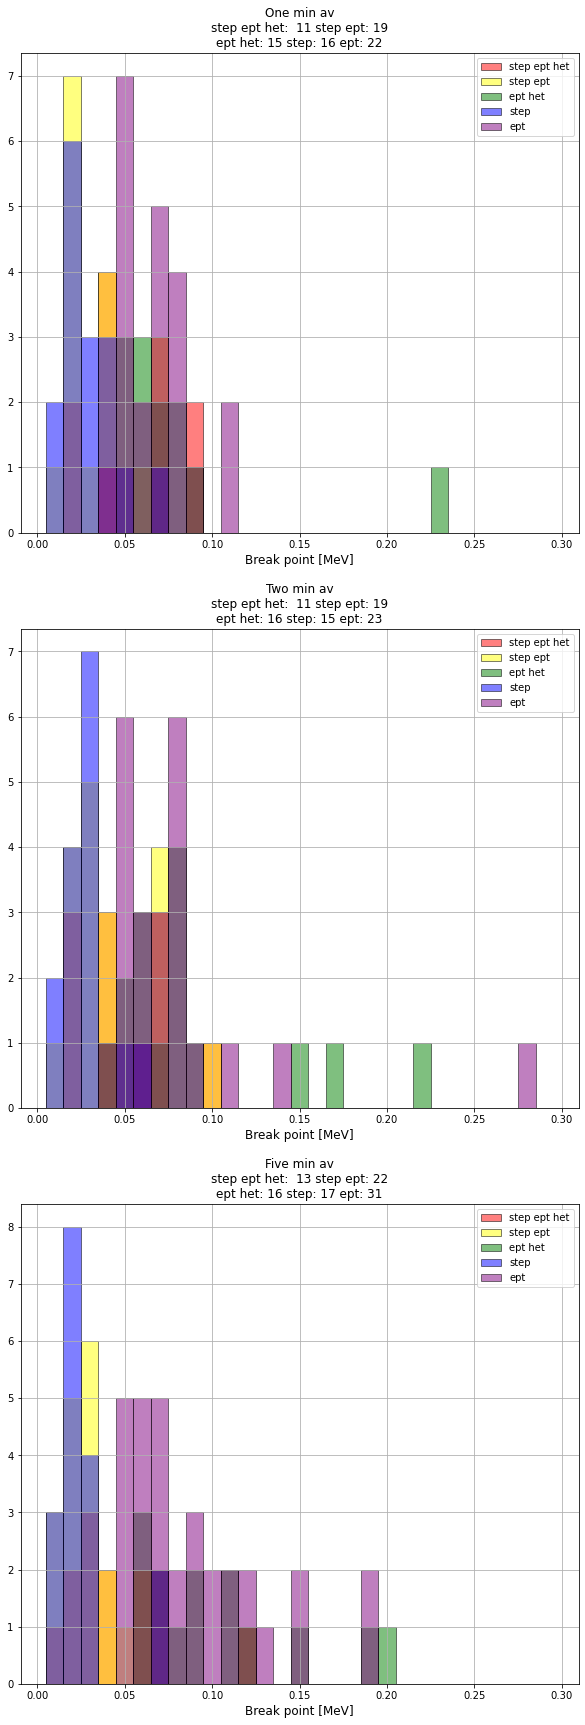

In [38]:
f, ax = plt.subplots(3,1, figsize=(10,30)) 

ax[0].hist(one_step_ept_het['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[0].hist(one_step_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[0].hist(one_ept_het['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[0].hist(one_step['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[0].hist(one_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[0].set_xlabel('Break point [MeV]', size=12)
ax[0].set_title('One min av'+'\n'+'step ept het:  '+ n1_step_ept_het+' '+'step ept: '+n1_step_ept+'\n'+'ept het: '+n1_ept_het+' '+'step: '+n1_step+' '+'ept: '+n1_ept)
ax[0].grid()
ax[0].legend(prop={'size': 10})

ax[1].hist(two_step_ept_het['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[1].hist(two_step_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[1].hist(two_ept_het['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[1].hist(two_step['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[1].hist(two_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[1].set_xlabel('Break point [MeV]', size=12) 
ax[1].set_title('Two min av'+'\n'+'step ept het:  '+ n2_step_ept_het+' '+'step ept: '+n2_step_ept+'\n'+'ept het: '+n2_ept_het+' '+'step: '+n2_step+' '+'ept: '+n2_ept)
ax[1].grid()
ax[1].legend(prop={'size': 10})

ax[2].hist(five_step_ept_het['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[2].hist(five_step_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[2].hist(five_ept_het['break_point_mev'],bins=np.arange(0,0.3,0.01), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[2].hist(five_step['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[2].hist(five_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[2].set_xlabel('Break point [MeV]', size=12)
ax[2].set_title('Five min av'+'\n'+'step ept het:  '+ n5_step_ept_het+' '+'step ept: '+n5_step_ept+'\n'+'ept het: '+n5_ept_het+' '+'step: '+n5_step+' '+'ept: '+n5_ept)
ax[2].grid()
ax[2].legend(prop={'size': 10})

plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()

In [39]:
n1_step_ept_het = str(one_step_ept_het['exp_cutoff_point_mev'].count())
n2_step_ept_het = str(two_step_ept_het['exp_cutoff_point_mev'].count())
n5_step_ept_het = str(five_step_ept_het['exp_cutoff_point_mev'].count())

n1_step_ept = str(one_step_ept['exp_cutoff_point_mev'].count())
n2_step_ept = str(two_step_ept['exp_cutoff_point_mev'].count())
n5_step_ept = str(five_step_ept['exp_cutoff_point_mev'].count())

n1_ept_het = str(one_ept_het['exp_cutoff_point_mev'].count())
n2_ept_het = str(two_ept_het['exp_cutoff_point_mev'].count())
n5_ept_het = str(five_ept_het['exp_cutoff_point_mev'].count())

n1_step = str(one_step['exp_cutoff_point_mev'].count())
n2_step = str(two_step['exp_cutoff_point_mev'].count())
n5_step = str(five_step['exp_cutoff_point_mev'].count())

n1_ept = str(one_ept['exp_cutoff_point_mev'].count())
n2_ept = str(two_ept['exp_cutoff_point_mev'].count())
n5_ept = str(five_ept['exp_cutoff_point_mev'].count())

C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\matplotlib\axes\_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\matplotlib\axes\_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


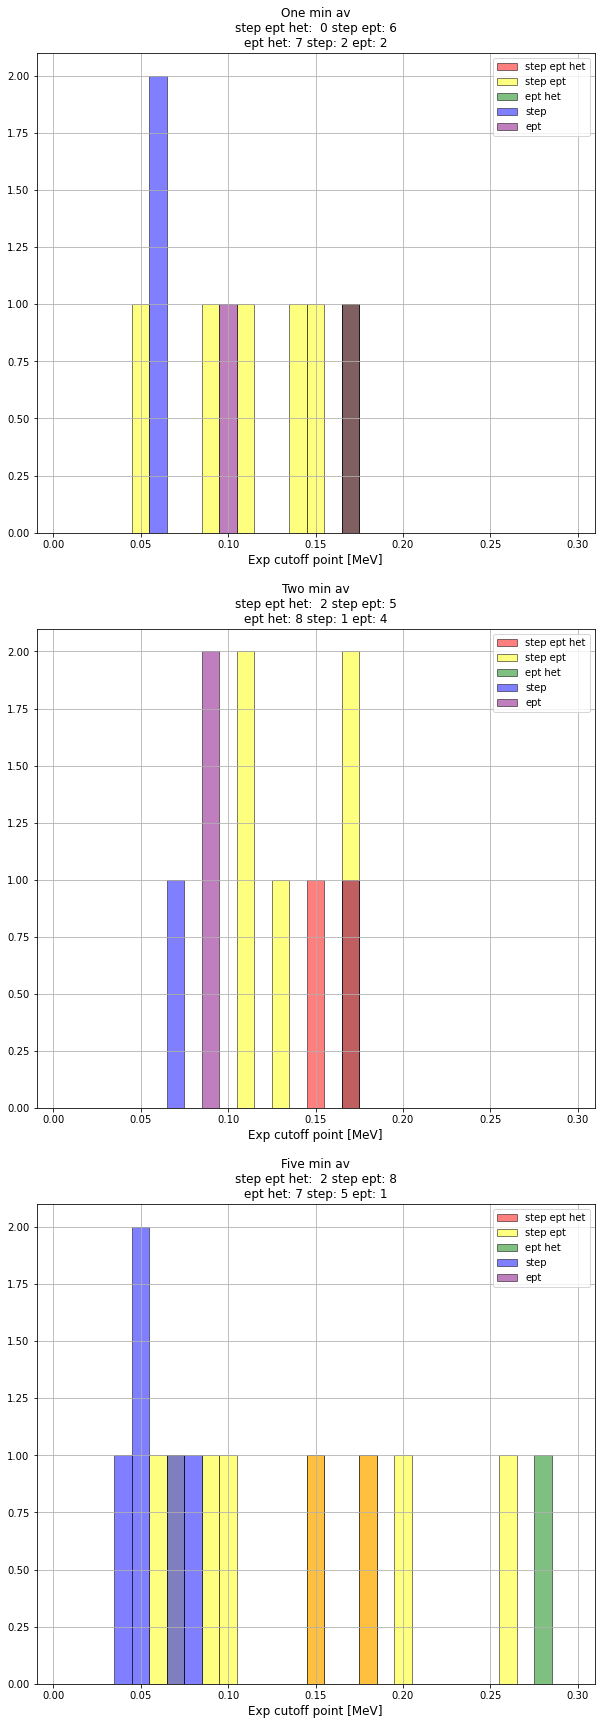

In [40]:
f, ax = plt.subplots(3,1, figsize=(10,30)) 

ax[0].hist(one_step_ept_het['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[0].hist(one_step_ept['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[0].hist(one_ept_het['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[0].hist(one_step['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[0].hist(one_ept['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[0].set_xlabel('Exp cutoff point [MeV]', size=12)
ax[0].set_title('One min av'+'\n'+'step ept het:  '+ n1_step_ept_het+' '+'step ept: '+n1_step_ept+'\n'+'ept het: '+n1_ept_het+' '+'step: '+n1_step+' '+'ept: '+n1_ept)
ax[0].grid()
ax[0].legend(prop={'size': 10})

ax[1].hist(two_step_ept_het['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[1].hist(two_step_ept['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[1].hist(two_ept_het['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[1].hist(two_step['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[1].hist(two_ept['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[1].set_xlabel('Exp cutoff point [MeV]', size=12) 
ax[1].set_title('Two min av'+'\n'+'step ept het:  '+ n2_step_ept_het+' '+'step ept: '+n2_step_ept+'\n'+'ept het: '+n2_ept_het+' '+'step: '+n2_step+' '+'ept: '+n2_ept)
ax[1].grid()
ax[1].legend(prop={'size': 10})

ax[2].hist(five_step_ept_het['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[2].hist(five_step_ept['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[2].hist(five_ept_het['exp_cutoff_point_mev'],bins=np.arange(0,0.3,0.01), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[2].hist(five_step['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[2].hist(five_ept['exp_cutoff_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[2].set_xlabel('Exp cutoff point [MeV]', size=12)
ax[2].set_title('Five min av'+'\n'+'step ept het:  '+ n5_step_ept_het+' '+'step ept: '+n5_step_ept+'\n'+'ept het: '+n5_ept_het+' '+'step: '+n5_step+' '+'ept: '+n5_ept)
ax[2].grid()
ax[2].legend(prop={'size': 10})

plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()

In [41]:
n1_step_ept_het = str(one_step_ept_het['break_point_mev'].count())
n2_step_ept_het = str(two_step_ept_het['break_point_mev'].count())
n5_step_ept_het = str(five_step_ept_het['break_point_mev'].count())

n1_step_ept = str(one_step_ept['break_point_mev'].count())
n2_step_ept = str(two_step_ept['break_point_mev'].count())
n5_step_ept = str(five_step_ept['break_point_mev'].count())

n1_ept_het = str(one_ept_het['break_point_mev'].count())
n2_ept_het = str(two_ept_het['break_point_mev'].count())
n5_ept_het = str(five_ept_het['break_point_mev'].count())

n1_step = str(one_step['break_point_mev'].count())
n2_step = str(two_step['break_point_mev'].count())
n5_step = str(five_step['break_point_mev'].count())

n1_ept = str(one_ept['break_point_mev'].count())
n2_ept = str(two_ept['break_point_mev'].count())
n5_ept = str(five_ept['break_point_mev'].count())

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

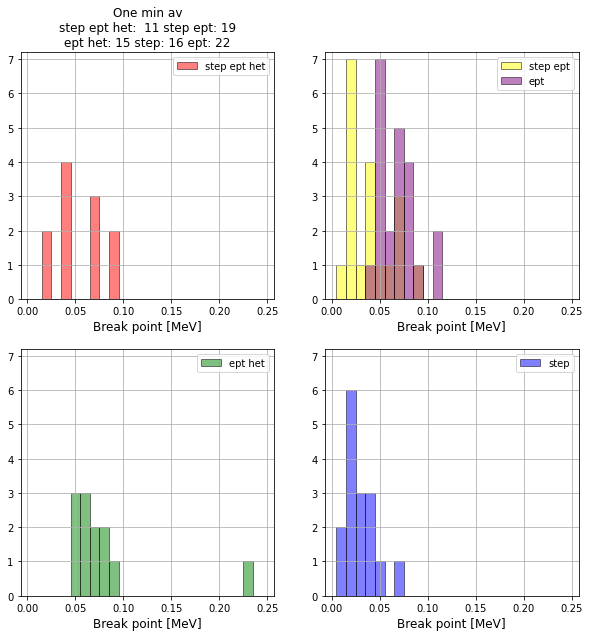

In [45]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 

b = np.arange(0,0.25,0.01)

ax[0,0].hist(one_step_ept_het['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[0,1].hist(one_step_ept['break_point_mev'], bins=b, align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[1,0].hist(one_ept_het['break_point_mev'], bins=b, align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[1,1].hist(one_step['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[0,1].hist(one_ept['break_point_mev'], bins=b, align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[0,0].set_xlabel('Break point [MeV]', size=12)
ax[0,1].set_xlabel('Break point [MeV]', size=12)
ax[1,0].set_xlabel('Break point [MeV]', size=12)
ax[1,0].set_xlabel('Break point [MeV]', size=12)
ax[1,1].set_xlabel('Break point [MeV]', size=12)


ax[0,0].grid()
ax[0,0].legend(prop={'size': 10})
ax[0,0].set_ylim(0,7.2)

ax[0,1].grid()
ax[0,1].legend(prop={'size': 10})
ax[0,1].set_ylim(0,7.2)

ax[1,0].grid()
ax[1,0].legend(prop={'size': 10})
ax[1,0].set_ylim(0,7.2)
ax[1,0].legend(prop={'size': 10})

ax[1,1].grid()
ax[1,1].legend(prop={'size': 10})
ax[1,1].set_ylim(0,7.2)


ax[0,0].set_title('One min av'+'\n'+'step ept het:  '+ n1_step_ept_het+' '+'step ept: '+n1_step_ept+'\n'+'ept het: '+n1_ept_het+' '+'step: '+n1_step+' '+'ept: '+n1_ept)


plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

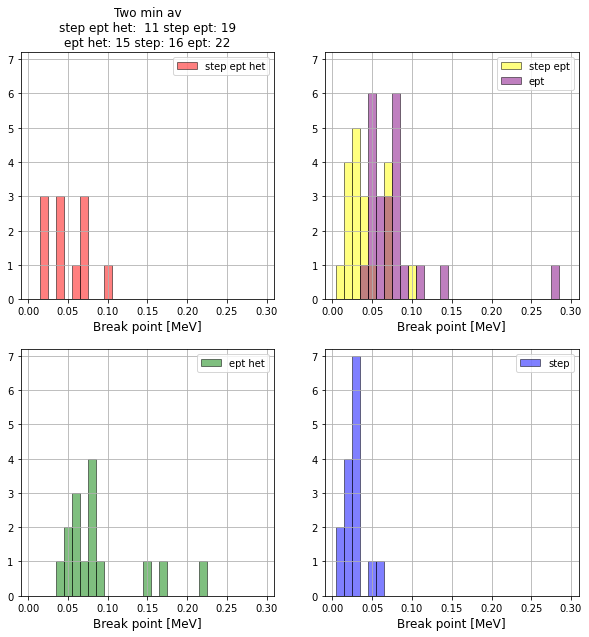

In [46]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 

b = np.arange(0,0.3,0.01)

ax[0,0].hist(two_step_ept_het['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[0,1].hist(two_step_ept['break_point_mev'], bins=b, align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[1,0].hist(two_ept_het['break_point_mev'], bins=b, align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[1,1].hist(two_step['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[0,1].hist(two_ept['break_point_mev'], bins=b, align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[0,0].set_xlabel('Break point [MeV]', size=12)
ax[0,1].set_xlabel('Break point [MeV]', size=12)
ax[1,0].set_xlabel('Break point [MeV]', size=12)
ax[1,0].set_xlabel('Break point [MeV]', size=12)
ax[1,1].set_xlabel('Break point [MeV]', size=12)


ax[0,0].grid()
ax[0,0].legend(prop={'size': 10})
ax[0,0].set_ylim(0,7.2)

ax[0,1].grid()
ax[0,1].legend(prop={'size': 10})
ax[0,1].set_ylim(0,7.2)

ax[1,0].grid()
ax[1,0].legend(prop={'size': 10})
ax[1,0].set_ylim(0,7.2)
ax[1,0].legend(prop={'size': 10})

ax[1,1].grid()
ax[1,1].legend(prop={'size': 10})
ax[1,1].set_ylim(0,7.2)

ax[0,0].set_title('Two min av'+'\n'+'step ept het:  '+ n1_step_ept_het+' '+'step ept: '+n1_step_ept+'\n'+'ept het: '+n1_ept_het+' '+'step: '+n1_step+' '+'ept: '+n1_ept)


plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

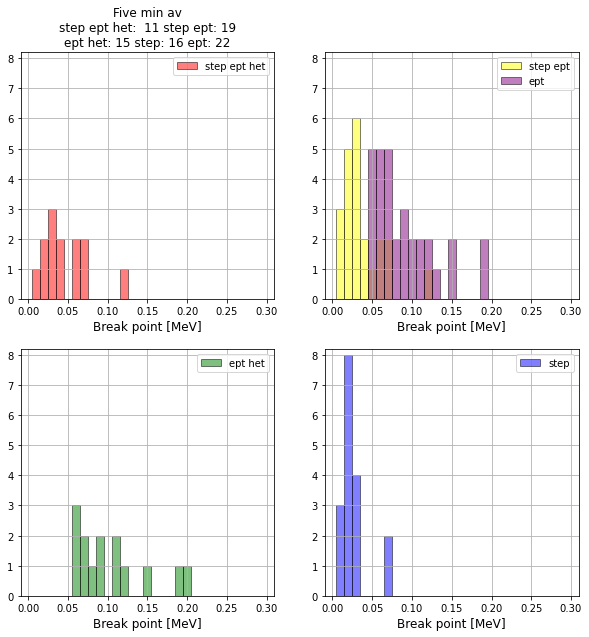

In [47]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 

np.arange(0,0.25,0.01)

ax[0,0].hist(five_step_ept_het['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[0,1].hist(five_step_ept['break_point_mev'], bins=b, align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[1,0].hist(five_ept_het['break_point_mev'], bins=b, align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[1,1].hist(five_step['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[0,1].hist(five_ept['break_point_mev'], bins=b, align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[0,0].set_xlabel('Break point [MeV]', size=12)
ax[0,1].set_xlabel('Break point [MeV]', size=12)
ax[1,0].set_xlabel('Break point [MeV]', size=12)
ax[1,0].set_xlabel('Break point [MeV]', size=12)
ax[1,1].set_xlabel('Break point [MeV]', size=12)


ax[0,0].grid()
ax[0,0].legend(prop={'size': 10})
ax[0,0].set_ylim(0,8.2)

ax[0,1].grid()
ax[0,1].legend(prop={'size': 10})
ax[0,1].set_ylim(0,8.2)

ax[1,0].grid()
ax[1,0].legend(prop={'size': 10})
ax[1,0].set_ylim(0,8.2)
ax[1,0].legend(prop={'size': 10})

ax[1,1].grid()
ax[1,1].legend(prop={'size': 10})
ax[1,1].set_ylim(0,8.2)



ax[0,0].set_title('Five min av'+'\n'+'step ept het:  '+ n1_step_ept_het+' '+'step ept: '+n1_step_ept+'\n'+'ept het: '+n1_ept_het+' '+'step: '+n1_step+' '+'ept: '+n1_ept)


plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)


In [29]:
ax[1].hist(two_step_ept_het['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[1].hist(two_step_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[1].hist(two_ept_het['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[1].hist(two_step['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[1].hist(two_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[1].set_xlabel('Break point [MeV]', size=12) 
ax[1].set_title('Two min av'+'\n'+'step ept het:  '+ n2_step_ept_het+' '+'step ept: '+n2_step_ept+'\n'+'ept het: '+n2_ept_het+' '+'step: '+n2_step+' '+'ept: '+n2_ept)
ax[1].grid()
ax[1].legend(prop={'size': 10})

ax[2].hist(five_step_ept_het['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='red', edgecolor='black', label = 'step ept het', alpha = 0.5)
ax[2].hist(five_step_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='yellow', edgecolor='black', label = 'step ept', alpha = 0.5)
ax[2].hist(five_ept_het['break_point_mev'],bins=np.arange(0,0.3,0.01), align='right', color='green', edgecolor='black', label = 'ept het', alpha = 0.5)
ax[2].hist(five_step['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='blue', edgecolor='black', label = 'step', alpha = 0.5)
ax[2].hist(five_ept['break_point_mev'], bins=np.arange(0,0.3,0.01), align='right', color='purple', edgecolor='black', label = 'ept', alpha = 0.5)


ax[2].set_xlabel('Break point [MeV]', size=12)
ax[2].set_title('Five min av'+'\n'+'step ept het:  '+ n5_step_ept_het+' '+'step ept: '+n5_step_ept+'\n'+'ept het: '+n5_ept_het+' '+'step: '+n5_step+' '+'ept: '+n5_ept)
ax[2].grid()
ax[2].legend(prop={'size': 10})



AttributeError: 'numpy.ndarray' object has no attribute 'hist'